# Test om koden er riktig implementert

Her er et forslag til testfunksjoner for å sjekke om koden er riktig implementert.
```assert variabel``` vil gi en feilmelding med mindre variabelen ```variabel = True```. For eksempel vil ```assert a == b``` gi en feilmelding med mindre ```a``` og ```b``` er like.

In [33]:
#For eksempel:
variable = True
assert variable, "You need to change 'variable' to True"

In [34]:
from layers import *
from neural_network import NeuralNetwork
from utils import onehot
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#We choose some arbitrary values for the dimensions
b = 6
n_max = 7
m = 8
n = 5

d = 10
k = 5
p = 20

#Create an arbitrary dataset
x = np.random.randint(0, m, (b,n))
y = np.random.randint(0, m, (b,n_max))

#initialize the layers
feed_forward = FeedForward(d,p)
attention = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed = LinearLayer(d,m)
softmax = Softmax()


#a manual forward pass
X = onehot(x, m)

z0 = embed_pos.forward(X)
z1 = feed_forward.forward(z0)
z2 = attention.forward(z1)
z3 = un_embed.forward(z2)
Z = softmax.forward(z3) 


#check the shapes
assert X.shape == (b,m,n), f"X.shape={X.shape}, expected {(b,m,n)}"
assert z0.shape == (b,d,n), f"z0.shape={z0.shape}, expected {(b,d,n)}"
assert z1.shape == (b,d,n), f"z1.shape={z1.shape}, expected {(b,d,n)}"
assert z2.shape == (b,d,n), f"z2.shape={z2.shape}, expected {(b,d,n)}"
assert z3.shape == (b,m,n), f"z3.shape={z3.shape}, expected {(b,m,n)}"
assert Z.shape == (b,m,n), f"Z.shape={Z.shape}, expected {(b,m,n)}"

#is X one-hot?
assert X.sum() == b*n, f"X.sum()={X.sum()}, expected {b*n}"


assert np.allclose(Z.sum(axis=1), 1), f"Z.sum(axis=1)={Z.sum(axis=1)}, expected {np.ones(b)}"
assert np.abs(Z.sum() - b*n) < 1e-5, f"Z.sum()={Z.sum()}, expected {b*n}"
assert np.all(Z>=0), f"Z={Z}, expected all entries to be non-negative"



In [36]:

#test the forward pass
x = np.random.randint(0, m, (b,n_max))
X = onehot(x, m)

#we test with a y that is shorter than the maximum length
n_y = n_max - 1
y = np.random.randint(0, m, (b,n_y))

#initialize a neural network based on the layers above
network = NeuralNetwork([embed_pos, feed_forward, attention, un_embed, softmax])
#and a loss function
loss = CrossEntropy()

#do a forward pass
Z = network.forward(X)

#compute the loss
L = loss.forward(Z, y)

#get the derivative of the loss wrt Z
grad_Z = loss.backward()
#and perform a backward pass
_ = network.backward(grad_Z)

#and and do a gradient descent step
_ = network.step_gd(0.01)

In [37]:
"""
Here you may add additional tests to for example:
- Check if the ['d'] keys in the parameter dictionaries are not None, or receive something when running backward pass
- Check if the parameters change when you perform a gradient descent step
- Check if the loss decreases when you perform a gradient descent step

This is voluntary, but could be useful.
"""

"\nHere you may add additional tests to for example:\n- Check if the ['d'] keys in the parameter dictionaries are not None, or receive something when running backward pass\n- Check if the parameters change when you perform a gradient descent step\n- Check if the loss decreases when you perform a gradient descent step\n\nThis is voluntary, but could be useful.\n"

In [38]:
#check if loss is non-negative
assert L >= 0, f"L={L}, expected L>=0"
assert grad_Z.shape == Z.shape, f"grad_Z.shape={grad_Z.shape}, expected {Z.shape}"

#check if onehot(y) gives zero loss
Y = onehot(y, m)
L = loss.forward(Y, y)
assert L < 1e-5, f"L={L}, expected L<1e-5"


In [39]:
# feed_forward1 = FeedForward(d,p)
# attention1 = Attention(d,k)
# embed_pos = EmbedPosition(n_max,m,d)
# un_embed_pos = LinearLayer(d,m)
# softmax = Softmax()
# layers = [embed_pos,attention1,feed_forward1,un_embed_pos, softmax]
# nueralnet = NeuralNetwork(layers)

b = 6
n_max = 7
m = 8
n = 5

d = 10
k = 5
p = 20

x = np.random.randint(0, m, (b,n_max))
y = np.random.randint(0, m, (b,n_max-1))

def algorithm_4(x, y, m , d, p, k, n_max):
    n_iter = 100
    loss = CrossEntropy()
    feed_forward1 = FeedForward(d,p)
    attention1 = Attention(d,k)
    embed_pos = EmbedPosition(n_max,m,d)
    un_embed_pos = LinearLayer(d,m)
    softmax = Softmax()
    layers = [embed_pos, attention1,feed_forward1, un_embed_pos, softmax]
    nueralnet = NeuralNetwork(layers)

    alpha = 0.001
    Losses = []
    for j in range(1,n_iter):
        X = onehot(x, m)
        Z = nueralnet.forward(X) 
        Losses.append(loss.forward(Z,y))
        dLdz = loss.backward()
        nueralnet.backward(dLdz) 
        nueralnet.step_adam(j,alpha)
        print(f'loss for iteration {j}: {loss.forward(Z,y)}') 
    return Losses   

arr = algorithm_4(x, y, m , d, p, k, n_max)



loss for iteration 1: 2.070445019673872
loss for iteration 2: 2.068940078679119
loss for iteration 3: 2.0674213312989096
loss for iteration 4: 2.0658879500903833
loss for iteration 5: 2.0643422508710554
loss for iteration 6: 2.06277865886093
loss for iteration 7: 2.061194396153204
loss for iteration 8: 2.0595889127895264
loss for iteration 9: 2.0579626316247968
loss for iteration 10: 2.056310620475764
loss for iteration 11: 2.054637387396129
loss for iteration 12: 2.052938065313201
loss for iteration 13: 2.0512081514799303
loss for iteration 14: 2.0494423157184514
loss for iteration 15: 2.0476387646092022
loss for iteration 16: 2.045795632380391
loss for iteration 17: 2.043910845332696
loss for iteration 18: 2.0419842003247832
loss for iteration 19: 2.0400069025856338
loss for iteration 20: 2.0379751108462627
loss for iteration 21: 2.0358902217339483
loss for iteration 22: 2.0337469068178127
loss for iteration 23: 2.0315432615134394
loss for iteration 24: 2.0292707869689575
loss for it

[2.070445019673872, 2.068940078679119, 2.0674213312989096, 2.0658879500903833, 2.0643422508710554, 2.06277865886093, 2.061194396153204, 2.0595889127895264, 2.0579626316247968, 2.056310620475764, 2.054637387396129, 2.052938065313201, 2.0512081514799303, 2.0494423157184514, 2.0476387646092022, 2.045795632380391, 2.043910845332696, 2.0419842003247832, 2.0400069025856338, 2.0379751108462627, 2.0358902217339483, 2.0337469068178127, 2.0315432615134394, 2.0292707869689575, 2.026921930903445, 2.0244933458774717, 2.021986141580848, 2.0193886219482997, 2.01669645329523, 2.01391020608707, 2.011027457402892, 2.0080369082749763, 2.0049369634702323, 2.0017218210328784, 1.998387867187895, 1.9949295325890253, 1.991348379704363, 1.9876448699313916, 1.9838098929898906, 1.9798399793947463, 1.9757181622021132, 1.9714471175199, 1.967002609604952, 1.9623912885065034, 1.9576212779922, 1.9527033842770356, 1.9476299484092183, 1.942434198463938, 1.9371039213568575, 1.9316702406362585, 1.926159934108743, 1.92057

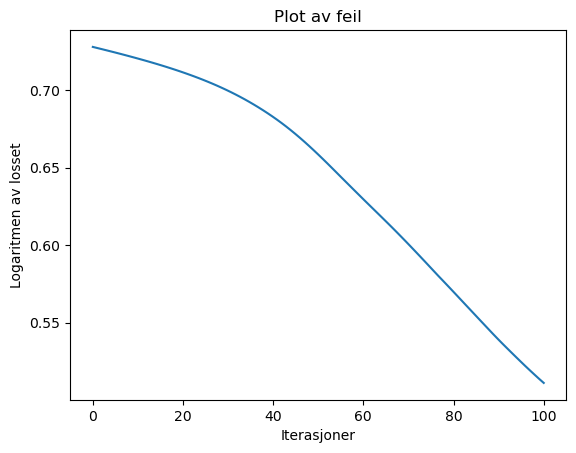

In [40]:
plt.plot(np.linspace(0,100,len(arr)),np.log(arr))
print(arr)
plt.xlabel('Iterasjoner')
plt.ylabel('Logaritmen av losset')
plt.title('Plot av feil')
plt.show()